**Dataset Description**

The dataset is water quality Dataset, containing information about water ingredients and various features like aluminium,bacteria and aluminium.

Dataset objective

Develop a binary classification model to predict if water safe(1) or not safe(0) based on column target "is_safe" by using a pretrained model and our Deep learning model from scratch.

In [ ]:

from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
from sklearn import svm
from sklearn.linear_model import Lasso, SGDRegressor, Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import tensorflow as tf
from sklearn.metrics import f1_score, confusion_matrix

from sklearn.metrics import precision_score, recall_score
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from tensorflow.keras.optimizers import Adam

In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd
missing_value = ['#NUM!', np.nan]
#,na_values = missing_value
dataset=pd.read_csv("/content/waterQuality1.csv",na_values = missing_value)

dataset


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1.0
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1.0
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0.0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1.0
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1.0
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1.0
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1.0
7997,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1.0


In [ ]:
dataset.shape

(7999, 21)

In [ ]:
#target column
dataset["is_safe"].unique()

array([ 1.,  0., nan])

In [ ]:
dataset["is_safe"].value_counts()

0.0    7084
1.0     912
Name: is_safe, dtype: int64

In [ ]:
dataset.dtypes

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe        float64
dtype: object

In [ ]:
dataset["ammonia"].unique()

array([ 9.08, 21.16, 14.02, ...,  2.78, 27.12, 10.  ])

In [ ]:
dataset.isnull().sum()

aluminium      0
ammonia        3
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        3
dtype: int64

In [ ]:
dataset.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7999.000000,7996.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,...,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7996.000000
mean,0.666158,14.278212,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,...,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673,0.114057
std,1.265145,8.878930,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,...,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
dataset.isnull().sum()

aluminium      0
ammonia        3
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        3
dtype: int64

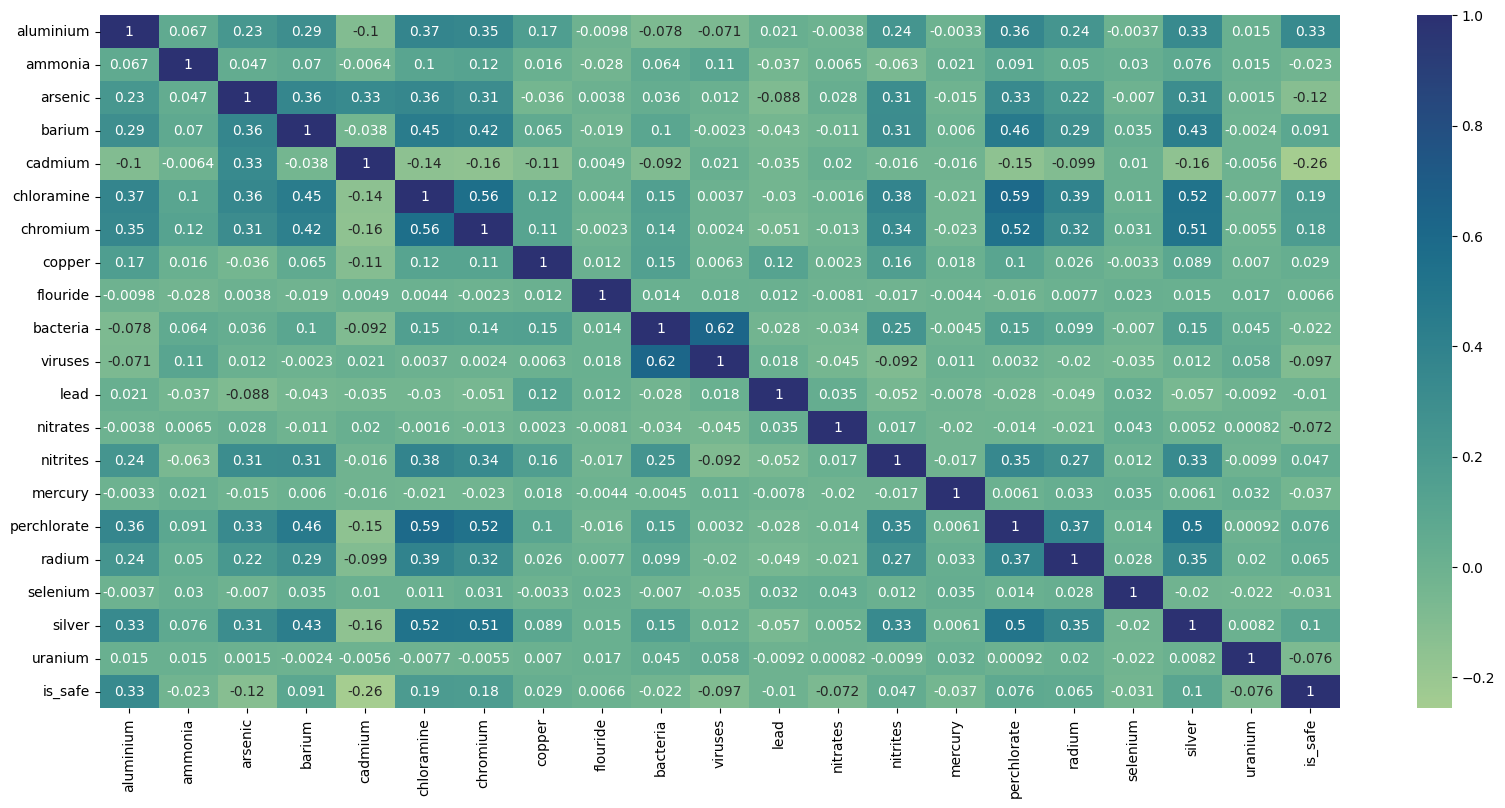

In [ ]:
#visualization
plt.figure(figsize=(20, 9))
sns.heatmap(dataset.corr(), annot=True, cmap="crest")
plt.show()

array([[<Axes: title={'center': 'aluminium'}>,
        <Axes: title={'center': 'ammonia'}>,
        <Axes: title={'center': 'arsenic'}>,
        <Axes: title={'center': 'barium'}>,
        <Axes: title={'center': 'cadmium'}>],
       [<Axes: title={'center': 'chloramine'}>,
        <Axes: title={'center': 'chromium'}>,
        <Axes: title={'center': 'copper'}>,
        <Axes: title={'center': 'flouride'}>,
        <Axes: title={'center': 'bacteria'}>],
       [<Axes: title={'center': 'viruses'}>,
        <Axes: title={'center': 'lead'}>,
        <Axes: title={'center': 'nitrates'}>,
        <Axes: title={'center': 'nitrites'}>,
        <Axes: title={'center': 'mercury'}>],
       [<Axes: title={'center': 'perchlorate'}>,
        <Axes: title={'center': 'radium'}>,
        <Axes: title={'center': 'selenium'}>,
        <Axes: title={'center': 'silver'}>,
        <Axes: title={'center': 'uranium'}>],
       [<Axes: title={'center': 'is_safe'}>, <Axes: >, <Axes: >,
        <Axes: >, <Axes

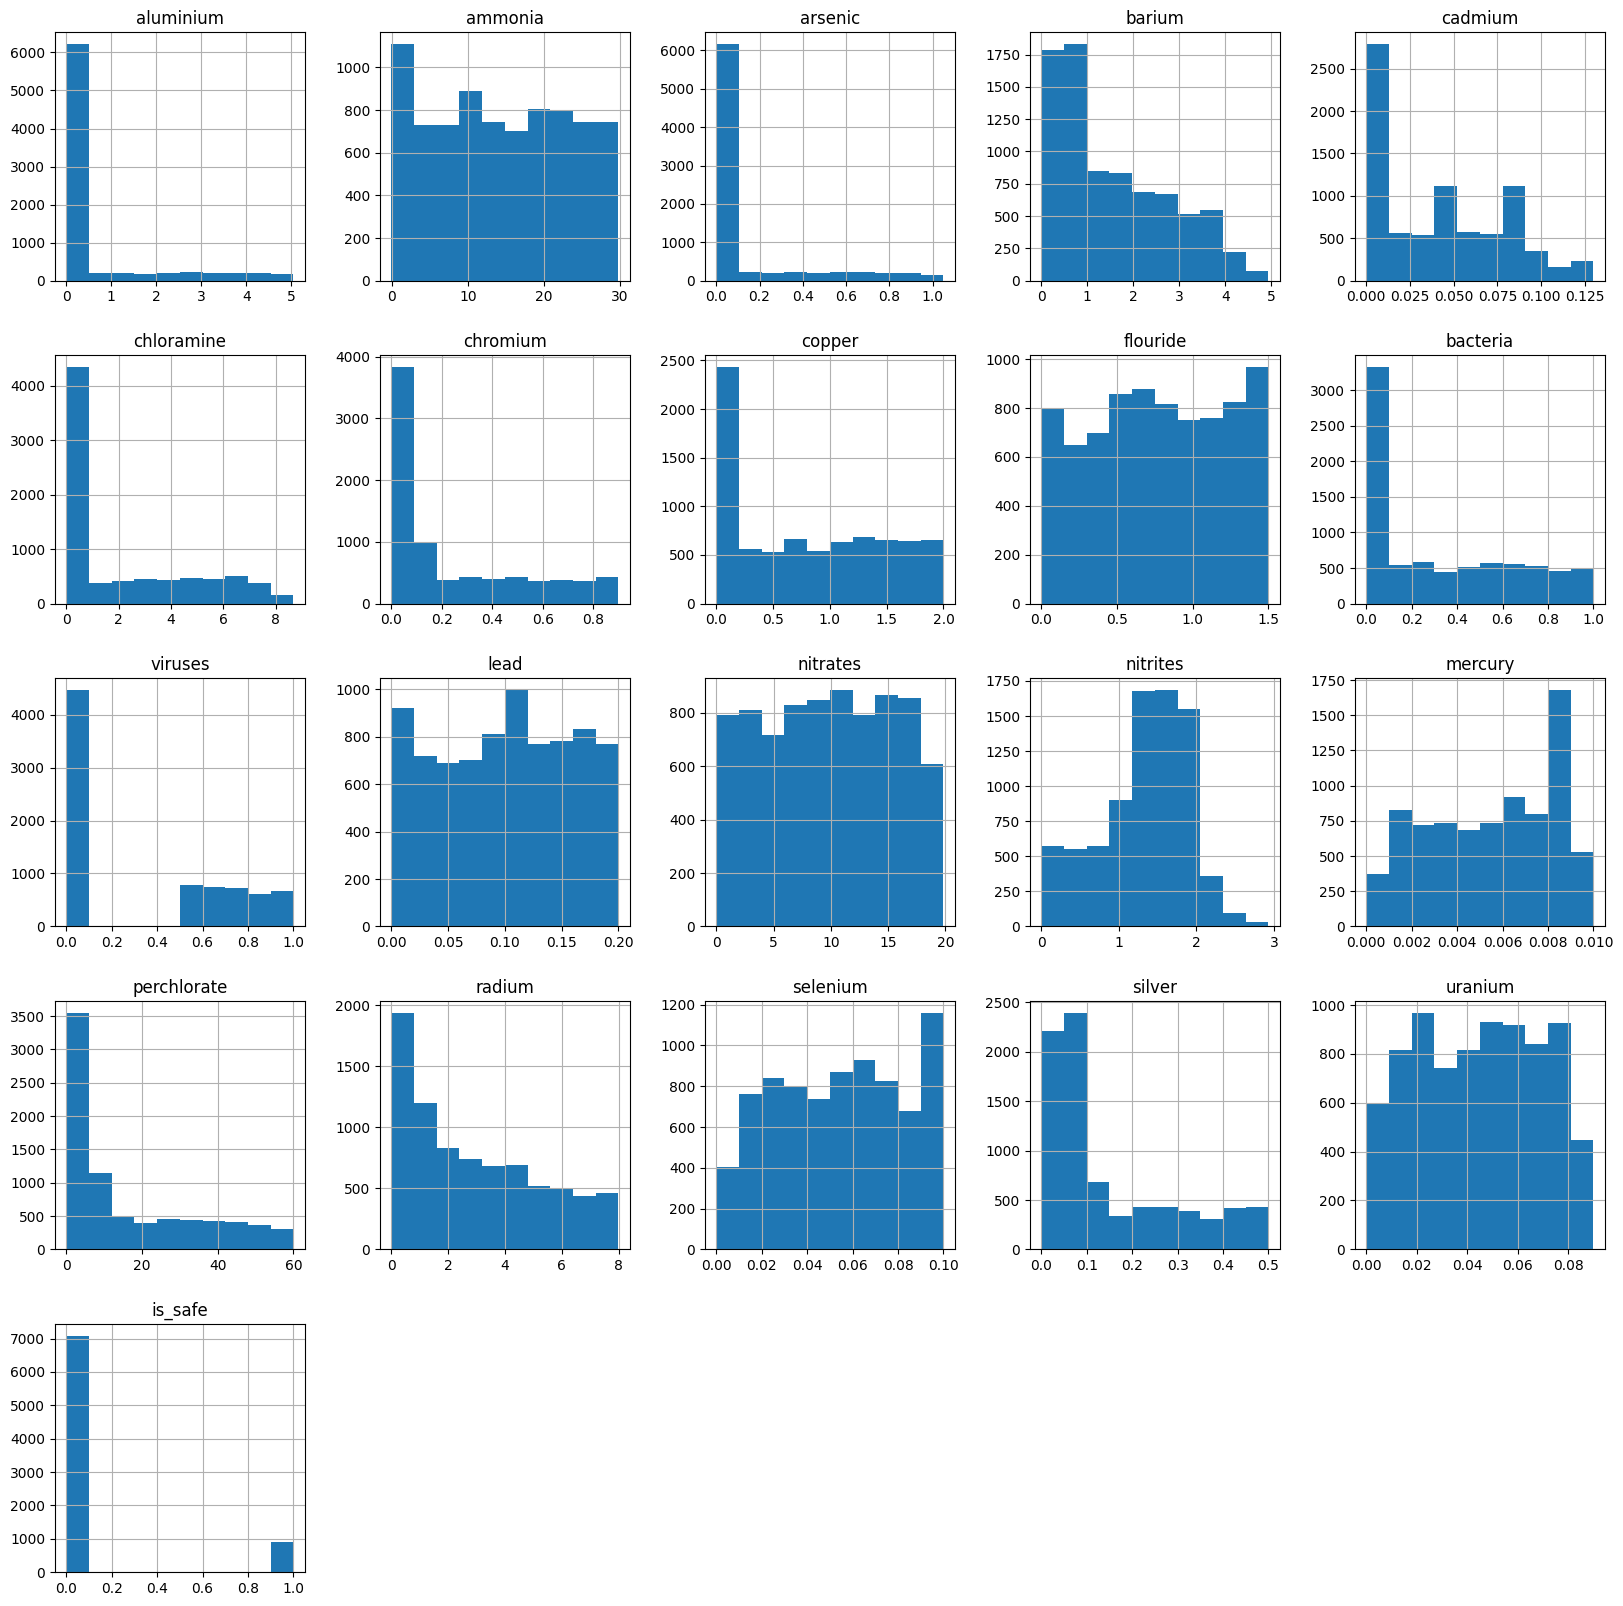

In [ ]:
dataset.hist(figsize = (20,20))

In [ ]:
#handling missing values
dataset.dropna(subset=['is_safe','ammonia'], axis=0, inplace=True)

In [ ]:
dataset.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.shape

(7996, 21)

In [ ]:
#up-sampling to balance classes
X = dataset.drop('is_safe', axis=1)  # Features
y = dataset['is_safe']  # Target variable

over_sampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = over_sampler.fit_resample(X, y)

In [ ]:
print(X_resampled)

       aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0           1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1           2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2           1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3           1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4           0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...          ...      ...      ...     ...      ...         ...       ...   
14163       2.24     5.52     0.03    0.80    0.003        4.16      0.54   
14164       2.54     9.92     0.05    1.65    0.001        1.19      0.47   
14165       1.19    18.95     0.03    2.87    0.007        6.86      0.81   
14166       3.27     7.34     0.01    0.47    0.005        4.57      0.23   
14167       0.09     9.71     0.09    0.98    0.070        0.56      0.00   

       copper  flouride  bacteria  viruses   lead  nitrates  nitrites  \
0 

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [ ]:
#first prettrained model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set and evaluate the model
#x_test
y_pred_rf = rf_classifier.predict(X_train)
#y_test
rf_accuracy = accuracy_score(y_train, y_pred_rf)

# Calculate precision, recall, and F1 score
precision = precision_score(y_train, y_pred_rf)
recall = recall_score(y_train, y_pred_rf)
f1 = f1_score(y_train, y_pred_rf)

print(f"RandomForestClassifier Accuracy: {rf_accuracy:.2f}")

# Print confusion matrix, classification report
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_train, y_pred_rf))

RandomForestClassifier Accuracy: 0.98
Confusion Matrix:
[[2054   61]
 [   6 2130]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      2115
         1.0       0.97      1.00      0.98      2136

    accuracy                           0.98      4251
   macro avg       0.98      0.98      0.98      4251
weighted avg       0.98      0.98      0.98      4251



In [ ]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)



print(f"svm Accuracy: {accuracy:.2f}")

# Print confusion matrix, classification report, etc.
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

svm Accuracy: 0.78
Confusion Matrix:
[[1662  453]
 [ 461 1675]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78      2115
         1.0       0.79      0.78      0.79      2136

    accuracy                           0.78      4251
   macro avg       0.78      0.78      0.78      4251
weighted avg       0.78      0.78      0.78      4251



In [ ]:
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# Predict on the test set and evaluate the model
y_pred_xgb = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Classifier Accuracy: {xgb_accuracy:.2f}")

# Print confusion matrix, classification report, etc.
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classifier Accuracy: 0.99
Confusion Matrix:
[[2064   51]
 [   6 2130]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2115
         1.0       0.98      1.00      0.99      2136

    accuracy                           0.99      4251
   macro avg       0.99      0.99      0.99      4251
weighted avg       0.99      0.99      0.99      4251



In [ ]:
initial_fnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
initial_fnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
initial_fnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
_, accuracy = initial_fnn_model.evaluate(X_test, y_test)
print(f"initial FNN Accuracy: {accuracy:.2f}")

y_pred_initial_fnn = (initial_fnn_model.predict(X_test) > 0.5).astype("int32")

# Calculate F1 score for the initial FNN
fnn_f1 = f1_score(y_test, y_pred_initial_fnn)
print(f"initial FNN F1 Score: {fnn_f1:.2f}")

# Calculate confusion matrix for the initial FNN
fnn_conf_matrix = confusion_matrix(y_test, y_pred_initial_fnn)
print("initial FNN Confusion Matrix:")
print(fnn_conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_initial_fnn))


Epoch 1/50
248/248 [==============================] - 2s 4ms/step - loss: 0.5890 - accuracy: 0.7126 - val_loss: 0.5046 - val_accuracy: 0.7389
Epoch 2/50
248/248 [==============================] - 1s 3ms/step - loss: 0.4702 - accuracy: 0.7770 - val_loss: 0.4634 - val_accuracy: 0.7757
Epoch 3/50
248/248 [==============================] - 1s 3ms/step - loss: 0.4348 - accuracy: 0.7958 - val_loss: 0.4089 - val_accuracy: 0.8236
Epoch 4/50
248/248 [==============================] - 1s 3ms/step - loss: 0.4040 - accuracy: 0.8157 - val_loss: 0.3958 - val_accuracy: 0.8377
Epoch 5/50
248/248 [==============================] - 1s 3ms/step - loss: 0.3859 - accuracy: 0.8277 - val_loss: 0.3803 - val_accuracy: 0.8347
Epoch 6/50
248/248 [==============================] - 1s 3ms/step - loss: 0.3653 - accuracy: 0.8376 - val_loss: 0.3702 - val_accuracy: 0.8488
Epoch 7/50
248/248 [==============================] - 1s 3ms/step - loss: 0.3491 - accuracy: 0.8472 - val_loss: 0.3828 - val_accuracy: 0.8327
Epoch 

In [ ]:
modified_fnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
modified_fnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
modified_fnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
_, accuracy = modified_fnn_model.evaluate(X_test, y_test)
print(f"FNN Accuracy: {accuracy:.2f}")

y_pred_modified_fnn = (modified_fnn_model.predict(X_test) > 0.5).astype("int32")

# Calculate F1 score for the modified FNN
fnn_f1 = f1_score(y_test, y_pred_modified_fnn)
print(f"Modified FNN F1 Score: {fnn_f1:.2f}")

# Calculate confusion matrix for the modified FNN
fnn_conf_matrix = confusion_matrix(y_test, y_pred_modified_fnn)
print("Modified FNN Confusion Matrix:")
print(fnn_conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_modified_fnn))


Epoch 1/50
248/248 [==============================] - 2s 4ms/step - loss: 0.7241 - accuracy: 0.6525 - val_loss: 0.5295 - val_accuracy: 0.7409
Epoch 2/50
248/248 [==============================] - 1s 3ms/step - loss: 0.5513 - accuracy: 0.7173 - val_loss: 0.4926 - val_accuracy: 0.7656
Epoch 3/50
248/248 [==============================] - 1s 4ms/step - loss: 0.5045 - accuracy: 0.7491 - val_loss: 0.4492 - val_accuracy: 0.7908
Epoch 4/50
248/248 [==============================] - 1s 3ms/step - loss: 0.4727 - accuracy: 0.7711 - val_loss: 0.4244 - val_accuracy: 0.8165
Epoch 5/50
248/248 [==============================] - 1s 3ms/step - loss: 0.4462 - accuracy: 0.7889 - val_loss: 0.4168 - val_accuracy: 0.8206
Epoch 6/50
248/248 [==============================] - 1s 3ms/step - loss: 0.4255 - accuracy: 0.7994 - val_loss: 0.3962 - val_accuracy: 0.8266
Epoch 7/50
248/248 [==============================] - 1s 3ms/step - loss: 0.4054 - accuracy: 0.8110 - val_loss: 0.3883 - val_accuracy: 0.8286
Epoch 